## This is Notebook PART2
This is for additional things like LDA and Neural Nets (aka Deeper NLP...)

### Topic Modeling with LDA
Following instructions / code from: Topic Modeling in Python: Latent Dirichlet Allocation (LDA) - towarddatascience.com

In [1]:
# Load some relevant libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the pre-saved data set
data = pd.read_csv('df5_tweets.csv')
data.head()

,Unnamed: 0,text,brand,feelings,text_fixed,char_count,stopwords,polarity,subjectivity
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,0,wesley83 3g iphone 3 hrs tweeting rise_austin ...,117,10,-0.200000,0.400000
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,1,jessedee know fludapp awesome ipadiphone app y...,130,5,0.466667,0.933333
2,2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,1,swonderlin wait ipad 2 also sale,74,8,0.000000,0.000000
3,3,@sxsw I hope this year's festival isn't as cra...,Apple,0,hope years festival isnt crashy years iphone app,76,5,0.000000,0.000000
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,sxtxstate great stuff fri marissa mayer google...,117,1,0.800000,0.750000


In [3]:
# Remove unneeded columns
data2 = data.drop(columns=['Unnamed: 0', 'char_count', 'stopwords', 'polarity', 'subjectivity'], axis=1)
data2.head()

,text,brand,feelings,text_fixed
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,0,wesley83 3g iphone 3 hrs tweeting rise_austin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,1,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,1,swonderlin wait ipad 2 also sale
3,@sxsw I hope this year's festival isn't as cra...,Apple,0,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,sxtxstate great stuff fri marissa mayer google...


In [4]:
# Try this from scratch... get rid of text_fixed
data2 = data2.drop(columns=['text_fixed'], axis=1)
data2.head()

,text,brand,feelings
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,1
3,@sxsw I hope this year's festival isn't as cra...,Apple,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1


### Time for some EDA on the text (tweets) themselves... 
After running the first LDA model (with all tweets) it became apparent more meaning could be gleaned by breaking up the tweets into a couple of different sets. So lets break it into a couple of different df.

In [27]:
data2.shape

(3182, 4)

In [29]:
# Consider splitting up into 4 dfs here...Apple positive; Google positive; Apple negative; Google negative
data3 = data2.loc[(data2['brand'] == 'Apple') & (data2['feelings'] == 1)]
print(data3.shape)
data3.head()

(1945, 4)


,text,brand,feelings,text_processed
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,1,@jessedee know about @fludapp awesome ipad/ip...
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,1,@swonderlin can not wait for #ipad 2 also they...
6,Beautifully smart and simple idea RT @madebyma...,Apple,1,beautifully smart and simple idea rt @madebyma...
7,Counting down the days to #sxsw plus strong Ca...,Apple,1,counting down the days to #sxsw plus strong ca...
12,Great #sxsw ipad app from @madebymany: http://...,Apple,1,great #sxsw ipad app from @madebymany: http://...


In [44]:
data3.text[1:25]

2     @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.                                                                            
6     Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB                          
7     Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear                                                                   
12    Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l                                                                                          
13    haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw                                                                         
15    Just added my #SXSW flights to @planely. Matching people on planes/airports. Also downloaded the @KLM iPhone app, nicely done.                             
16    Must have #SXSW app! R

In [73]:
data3.text.sample(20)

754     Does the apple pop-up store still have iPads? #sxsw #sxswi                                                                                    
1914    RT @mention @mention just saw you at lax I'm heading to #Sxsw  If you or your wife have an iPhone or iPad download my app #Freespeech @mention
2862    Yo this #SXSW iPhone app is illa-def! Go!                                                                                                     
974     Sweet! The convore iPhone app is ready for #sxsw : {link}                                                                                     
535     Very wise... RT @mention Apple is opening up a temp store in Austin for #SXSW {link} via @mention #iPad2                                      
2273    RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW  {link}                                              
962     Looks like all the apps for #SXSW are for the #iPhone. What about the #blackberry? The

#### SUMMARY of Apple positive tweets
iPdad2 excitement;
iPad app for conference - madebymany - Holler Gram - ease of use
purchasing apple proeducts / gear ; SmartCover; iPhone case
planely app - flights, planes, airports
purchase at Austin apple store / flash store / pop-up store
party
4Square app
xxxxx


In [32]:
data2.shape

(3182, 4)

In [33]:
data4 = data2.loc[(data2['brand'] == 'Google') & (data2['feelings'] == 1)]
print(data4.shape)
data4.head()

(719, 4)


,text,brand,feelings,text_processed
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,@sxtxstate great stuff on fri #sxsw: marissa m...
5,"#SXSW is just starting, #CTIA is around the co...",Google,1,#sxsw is just starting #ctia is around the cor...
8,Excited to meet the @samsungmobileus at #sxsw ...,Google,1,excited to meet the @samsungmobileus at #sxsw ...
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,Google,1,find &amp; start impromptu parties at #sxsw wi...
10,"Foursquare ups the game, just in time for #SXS...",Google,1,foursquare ups the game just in time for #sxsw...


In [43]:
data4.text[1:25]

5      #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan      
8      Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail                          
9      Find &amp; Start Impromptu Parties at #SXSW With @HurricaneParty http://bit.ly/gVLrIn I can't wait til the Android app comes out.               
10     Foursquare ups the game, just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.           
11     Gotta love this #SXSW Google Calendar featuring top parties/ show cases to check out.  RT @hamsandwich via @ischafer =&gt;http://bit.ly/aXZwxB  
19     Okay, this is really it: yay new @Foursquare for #Android app!!!!11 kthxbai. #sxsw                                                              
21     Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing

In [74]:
data4.text.sample(20)

1221    &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW.                                       
2818    At #SXSW seeing a demo of #Google maps for mobile 5.2. 3D rotational viewing is very cool                                                                            
1137    Mayer comes out sans intro, still gets cheers. #techrockstar Launches into Google's priority on location - Fast, Fun &amp; Future #sxsw                              
2139    RT @mention Google's Marissa Mayer on the location-based 'fast, fun and future' {link} #SXSW #SXSWi                                                                  
2096    RT @mention Geeking out on YouTube APIs #SXSW @mention Google Teaching Theatre {link}                                                                                
925     ballroom d: #marissagoogle talking about some cool projects (obv). love the Google Art Project. #sxsw                     

#### SUMMARY of Google positive tweets
Android fan
old Galaxy S running Android 2.1
impromptu parties; party w/ Google
Android app... for ? coming out; FourSquare for Android; 
best Android app ... Gowalla 3.0; (sweet; enjoying changes; 
google calendar for conference (parties and showcases)
google groups - PartnerHub for conference
open systems 
better cloud
meet google pepople - face to the company
google local and search
checkins feature
Mark Belinsky quote - think before you tweet
Barry Diller at party
3-D google maps / google maps navigation
game mechanics - google presenter
xxxxx


In [34]:
data5 = data2.loc[(data2['brand'] == 'Apple') & (data2['feelings'] == 0)]
print(data5.shape)
data5.head()

(387, 4)


,text,brand,feelings,text_processed
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,0,@wesley83 i have a 3g iphone after 3 hrs tweet...
3,@sxsw I hope this year's festival isn't as cra...,Apple,0,@sxsw i hope this year's festival isn't as cra...
14,I just noticed DST is coming this weekend. How...,Apple,0,i just noticed dst is coming this weekend how ...
38,attending @mention iPad design headaches #sxsw...,Apple,0,attending @mention ipad design headaches #sxsw...
48,What !?!? @mention #SXSW does not provide iPh...,Apple,0,what @mention #sxsw does not provide iphone ...


In [42]:
data5.text[1:25]

3      @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw                                                                    
14     I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone                      
38     attending @mention iPad design headaches #sxsw {link}                                                                                                 
48     What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!                                            
81     Seriously #sxsw? Did you do any testing on the mobile apps? Constant iPad crashes causing lost schedules, and no sync for WP7.                        
83     ipad2 and #sxsw...a conflagration of doofusness.  {link}                                                                                              
87     You spent $1,000+ to come to SXSW. \n\nYou've

In [75]:
data5.text.sample(20)

2389    RT @mention The iPad 2 is the also a cartoonishly large digital camera. #SXSW #CStejas {link}                                                      
2910    Looking at the line for the pop up #sxsw apple store...I can't think of a single object I want that much.                                          
2476    Fuck. iPhone crapped out, will not charge at all. Says it is charging, but at 5% after all night. What are my options in Austin? #sxsw             
2701    Horrible repressed memories of the Apple spinning beach ball coming back at the #progressbar talk. #sxsw                                           
382     I left my pocket guide at the hotel. I don't know how I'm going to cope. What does that say about the usability of iPad/iPhone app? #SXSW          
869     Just launched the pop-up Apple Store at #SXSW. It's our &quot;vintage&quot; store format: Mostly iPods and snarky employees. Ah, the good old days.
377     @mention  packing a point by showing iphone fragmentatio

#### SUMMARY of Apple negative tweets
lack of iphone chargers / charging stations
crashy iPhone app / apps crashing on iPad (conference app)
poor time zone  / time change correcting on iPhone
design headaches preso
iPad2 launch - desperate for attention
Japan relief - gave money so cant afford iPad2
poor battery life iPhone? ; iPad 3G sucks power fast
general company badness
Apple lacks presence at conferences
general dislike iPhone - want blackberry back
iPad news app - so last year
line is long at Apple store
temporary store - downtown Austin
bugs and errors with iPhone - auto-complete; provide geo-location
poor still pics on iPad2
long lines for iPad2
xxxxx


In [35]:
data6 = data2.loc[(data2['brand'] == 'Google') & (data2['feelings'] == 0)]
print(data6.shape)
data6.head()

(131, 4)


,text,brand,feelings,text_processed
30,@mention - False Alarm: Google Circles Not Co...,Google,0,@mention - false alarm: google circles not co...
157,they took away the lego pit but replaced it wi...,Google,0,they took away the lego pit but replaced it wi...
168,Google vs Bing on #bettersearch. Bing has a sh...,Google,0,google vs bing on #bettersearch bing has a sho...
238,ÛÏ@mention Google to Launch Major New Social ...,Google,0,ûï@mention google to launch major new social ...
269,google is interested in location based tech fo...,Google,0,google is interested in location based tech fo...


In [40]:
pd.set_option('display.max_colwidth', -1)

In [41]:
data6.text[1:25]

157    they took away the lego pit but replaced it with a recharging station ;) #sxsw and i might check prices for an iphone - crap samsung android     
168    Google vs Bing on #bettersearch. Bing has a shot at success w/ structured search.  Potentially higher margin CPA model vs #Google. #SXSW         
238    ÛÏ@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxswÛ \nIt'll never beat myspace.                 
269    google is interested in location based tech for indoor venues - businesses, convention centers etc.  Tech needs to improve first.  #sxsw         
302    more that just location, PixieEngine! RT @mention Google says the future is location, location, location: {link} #SXSW #CNN                      
307    Google to Launch Major New Social Network Called Circles (Updated) {link} *Not launched at #SXSW, but soon. Should I care?                       
321    Google to launch product! Wait, no launch, but product exists.  Wait, produ

In [76]:
data6.text.sample(20)

1563    Google will eat itself #rhizome #sxswk #sxsw  @mention Hilton {link}                                                                                     
831     Marissa Mayer: Google maps should have better customer service, quicker responses. #sxsw #FH                                                             
1101    Ha! RT @mention Google guy at #sxsw talk is explaining how he made realistic Twitter bots as an experiment. Gee, thanks for doing that.                  
1239    My #sxsw Google calendar is getting a little out of control                                                                                              
347     compiling my #sxsw list in one google doc is taking a lot longer than i thought... so many parties. so many good musicians.                              
168     Google vs Bing on #bettersearch. Bing has a shot at success w/ structured search.  Potentially higher margin CPA model vs #Google. #SXSW                 
1986    RT @mention And it w

#### SUMMARY of Google negative tweets
samsung android phone dislike
google maps - takes long to fix; untrusted travel times; needs better cust. service; 
Marisa Mayer talk
search compared to Bing
new social netwrok - google circles (lame; not as good as mySpace; fail; overblown; 
location based tech for indoor venues
google doc slow
google Living Stories - did not change content creation process
google translate is clumsy
too business focused instead of users
is evil
need way to group apps - like iPad
xxxxx


## 0. Full Data Set into LDA

In [5]:
# TEXT Pre-processing
# Load the regular expression library
import re
# Remove punctuation
data2['text_processed'] = \
data2['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data2['text_processed'] = \
data2['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data2['text_processed'].head()

0    @wesley83 i have a 3g iphone after 3 hrs tweet...
1    @jessedee know about @fludapp  awesome ipad/ip...
2    @swonderlin can not wait for #ipad 2 also they...
3    @sxsw i hope this year's festival isn't as cra...
4    @sxtxstate great stuff on fri #sxsw: marissa m...
Name: text_processed, dtype: object

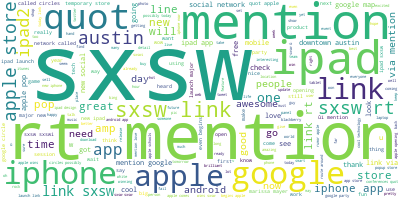

In [6]:
# EDA word viz... for whole dataset.
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data2['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [8]:
# Prepare the data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['sxsw', 'quot', 'mention', 'link', 'rt', 'amp', 'http' ,'sxswrt'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data2.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /Users/markp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wesley', 'iphone', 'hrs', 'tweeting', 'rise_austin', 'dead', 'need', 'upgrade', 'plugin', 'stations']


In [9]:
# Create dictionary and corpus
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [15]:
# Train the model
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"ipad" + 0.023*"google" + 0.021*"iphone" + 0.021*"apple" + '
  '0.020*"app" + 0.010*"store" + 0.009*"new" + 0.006*"people" + '
  '0.005*"android" + 0.005*"day"'),
 (1,
  '0.038*"ipad" + 0.025*"apple" + 0.023*"iphone" + 0.022*"google" + '
  '0.018*"new" + 0.016*"store" + 0.013*"app" + 0.007*"android" + 0.007*"get" + '
  '0.006*"free"'),
 (2,
  '0.020*"ipad" + 0.016*"apple" + 0.016*"google" + 0.010*"iphone" + '
  '0.007*"store" + 0.004*"via" + 0.004*"great" + 0.004*"win" + 0.004*"coming" '
  '+ 0.003*"free"'),
 (3,
  '0.040*"apple" + 0.038*"ipad" + 0.022*"google" + 0.022*"store" + '
  '0.021*"austin" + 0.013*"iphone" + 0.011*"pop" + 0.010*"launch" + '
  '0.007*"opening" + 0.007*"downtown"')]


In [17]:
# Code from Yish
print(lda_model.print_topics())

[(0, '0.042*"ipad" + 0.023*"google" + 0.021*"iphone" + 0.021*"apple" + 0.020*"app" + 0.010*"store" + 0.009*"new" + 0.006*"people" + 0.005*"android" + 0.005*"day"'), (1, '0.038*"ipad" + 0.025*"apple" + 0.023*"iphone" + 0.022*"google" + 0.018*"new" + 0.016*"store" + 0.013*"app" + 0.007*"android" + 0.007*"get" + 0.006*"free"'), (2, '0.020*"ipad" + 0.016*"apple" + 0.016*"google" + 0.010*"iphone" + 0.007*"store" + 0.004*"via" + 0.004*"great" + 0.004*"win" + 0.004*"coming" + 0.003*"free"'), (3, '0.040*"apple" + 0.038*"ipad" + 0.022*"google" + 0.022*"store" + 0.021*"austin" + 0.013*"iphone" + 0.011*"pop" + 0.010*"launch" + 0.007*"opening" + 0.007*"downtown"')]


In [18]:
# Code from Yish Study Group Notebook... 
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [19]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.062621  0.041000       1        1  31.132036
0     -0.011466 -0.083634       2        1  30.568855
1      0.036857  0.001809       3        1  29.952440
2     -0.088012  0.040825       4        1   8.346666, topic_info=    Category        Freq      Term       Total  loglift  logprob
155  Default  252.000000    austin  252.000000  30.0000  30.0000
257  Default   76.000000   opening   76.000000  29.0000  29.0000
67   Default  831.000000     apple  831.000000  28.0000  28.0000
240  Default   74.000000  downtown   74.000000  27.0000  27.0000
401  Default  135.000000    launch  135.000000  26.0000  26.0000
..       ...         ...       ...         ...      ...      ...
401   Topic4    6.681156    launch  135.944138  -0.5296  -5.9288
321   Topic4    5.633073    thanks   65.377983   0.0318  -6.0994
11    Topic4    6.716432       app  357.063416  -1.4900  -5.9235
204   Topic4    5.845110      like  116.350296  -0.5077  -6.0624
155   Topic4    5.781459    austin  252.661163  -1.2941  -6.0734

[328 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
791       1  0.126269    action
791       2  0.252538    action
791       3  0.631344    action
136       2  0.965877  airports
3798      4  0.633471  analysis
...     ...       ...       ...
812       2  0.656188     world
812       3  0.077199     world
812       4  0.038599     world
1028      1  0.096278    worlds
1028      2  0.866499    worlds

[574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

#### Observations on the initial LDA
Note that this initial Topic Model was with the entire dataset. Initially I tried a grouping of 10. The top 6 salient terms were all company and produt names. And it was odd that all 10 of the topics contained both Apple and Google names... there was no distinction. Also from the remaining words, it was difficult to dettermine which were negative terms... in this context. Need to keep in mind that overall only 16% of the tweets are negative, so this is reflected. Also tried (and displayed above 4 topics) there appears to be spacial distance in Topics 2 and 4, but diffuclt to pick out what is going on just by the words. 

#### Will try some other visualizations - still whole dataset
These are from the S.V. article on machinelearningplus.com

In [22]:
import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


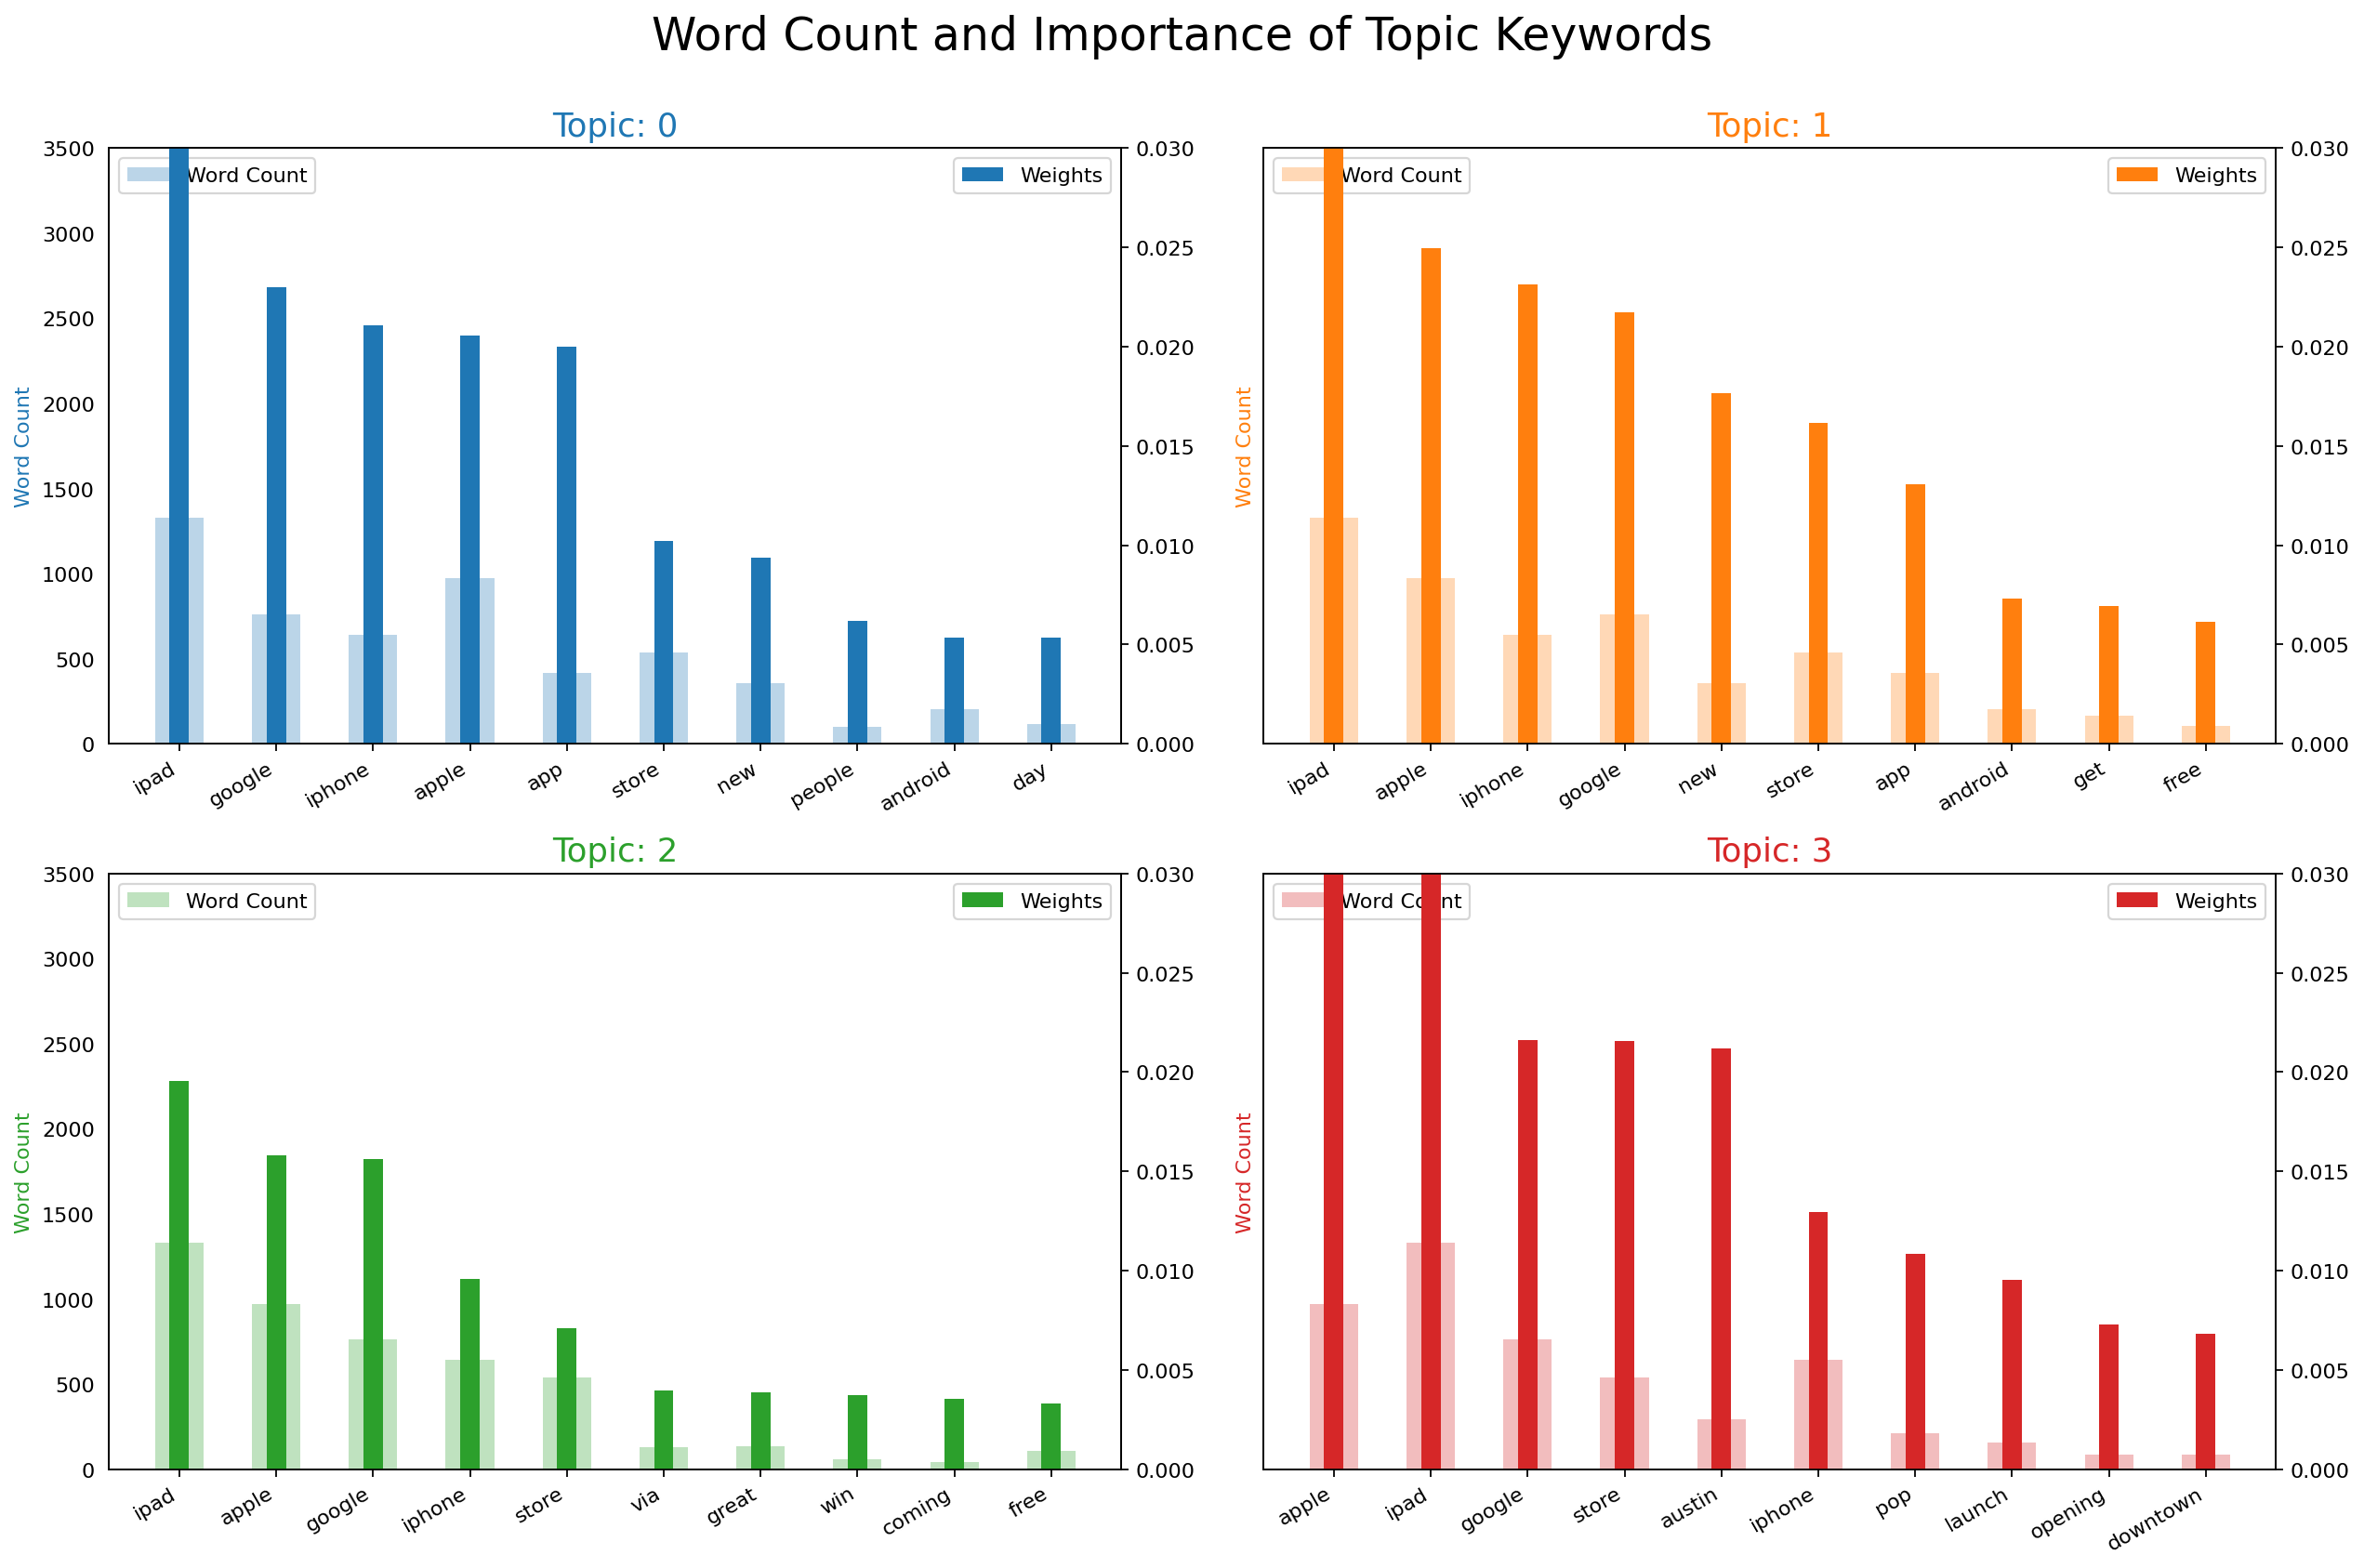

In [26]:
# Word count of Topic Keywords (can compare weights versus word counts).

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# Sentence chart colored by topic


### 1. Try seperate LDA for negative tweets (Apple)
This is data5 and has 387 tweets.

In [45]:
data5.head()

,text,brand,feelings,text_processed
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",Apple,0,@wesley83 i have a 3g iphone after 3 hrs tweeting at #rise_austin it was dead i need to upgrade plugin stations at #sxsw
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,Apple,0,@sxsw i hope this year's festival isn't as crashy as this year's iphone app #sxsw
14,I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone,Apple,0,i just noticed dst is coming this weekend how many iphone users will be an hour late at sxsw come sunday morning #sxsw #iphone
38,attending @mention iPad design headaches #sxsw {link},Apple,0,attending @mention ipad design headaches #sxsw {link}
48,What !?!? @mention #SXSW does not provide iPhone chargers?!? I've changed my mind about going next year!,Apple,0,what @mention #sxsw does not provide iphone chargers i've changed my mind about going next year


In [46]:
# TEXT Pre-processing
# Load the regular expression library
import re
# Remove punctuation
data5['text_processed'] = \
data5['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data5['text_processed'] = \
data5['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data5['text_processed'].head()

<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-46-16dd6e38873b>:5: DeprecationWarning: invalid escape sequence \.
  data5['text_processed'] = data5['text'].map(la

0     @wesley83 i have a 3g iphone after 3 hrs tweeting at #rise_austin it was dead  i need to upgrade plugin stations at #sxsw     
3     @sxsw i hope this year's festival isn't as crashy as this year's iphone app #sxsw                                             
14    i just noticed dst is coming this weekend how many iphone users will be an hour late at sxsw come sunday morning #sxsw #iphone
38    attending @mention ipad design headaches #sxsw {link}                                                                         
48    what  @mention  #sxsw does not provide iphone chargers  i've changed my mind about going next year                            
Name: text_processed, dtype: object

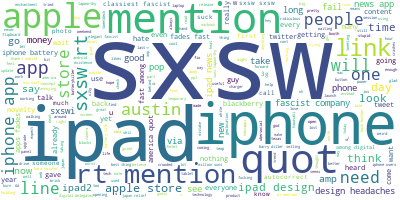

In [47]:
# EDA word viz... for whole dataset.
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data5['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [48]:
# Prepare the data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['sxsw', 'sxswi', 'quot', 'mention', 'link', 'rt', 'amp', 'http' ,'sxswrt', 'apple', 'ipad', 'iphone', 'ipad2', 'apples', 'quotapple'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data5.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['wesley', 'hrs', 'tweeting', 'rise_austin', 'dead', 'need', 'upgrade', 'plugin', 'stations']


[nltk_data] Downloading package stopwords to /Users/markp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Create dictionary and corpus
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [50]:
# Train the model
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"line" + 0.008*"store" + 0.008*"design" + 0.007*"go" + 0.007*"people" '
  '+ 0.006*"like" + 0.006*"look" + 0.005*"tapworthy" + 0.005*"back" + '
  '0.005*"using"'),
 (1,
  '0.017*"store" + 0.010*"austin" + 0.009*"company" + 0.009*"america" + '
  '0.009*"new" + 0.008*"apps" + 0.008*"app" + 0.008*"fascist" + 0.007*"like" + '
  '0.007*"pop"'),
 (2,
  '0.018*"app" + 0.010*"like" + 0.008*"year" + 0.008*"see" + 0.006*"many" + '
  '0.006*"need" + 0.006*"one" + 0.005*"new" + 0.005*"people" + 0.005*"long"'),
 (3,
  '0.014*"app" + 0.008*"design" + 0.007*"austin" + 0.007*"day" + 0.007*"good" '
  '+ 0.006*"call" + 0.006*"headaches" + 0.006*"apps" + 0.005*"blackberry" + '
  '0.005*"store"')]


In [51]:
# Visualize the resulting clusters
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.072103  0.064356  1       1        32.592178
2     -0.117558  0.004461  2       1        24.530035
0      0.040079 -0.107940  3       1        22.266285
3      0.005376  0.039122  4       1        20.611507, topic_info=    Category       Freq     Term      Total  loglift  logprob
9    Default  32.000000  app      32.000000  30.0000  30.0000
13   Default  7.000000   year     7.000000   29.0000  29.0000
399  Default  11.000000  company  11.000000  28.0000  28.0000
560  Default  8.000000   see      8.000000   27.0000  27.0000
397  Default  11.000000  america  11.000000  26.0000  26.0000
..       ...        ...      ...        ...      ...      ...
56   Topic4   2.609097   people   17.366096 -0.3162  -5.5432 
421  Topic4   2.322350   fades    7.672263   0.3843  -5.6596 
422  Topic4   2.208393   novelty  7.014429   0.4236  -5.7099 
308  Topic4   2.190659   via      8.220610   0.2569  -5.7180 
236  Topic4   2.179135   like     22.422115 -0.7518  -5.7232 

[278 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
48    1      0.387789  already
48    2      0.387789  already
48    3      0.129263  already
48    4      0.129263  already
397   1      0.767826  america
...  ..           ...      ...
1245  4      0.776325  yes    
812   1      0.166965  yet    
812   2      0.166965  yet    
812   3      0.166965  yet    
812   4      0.500896  yet    

[395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


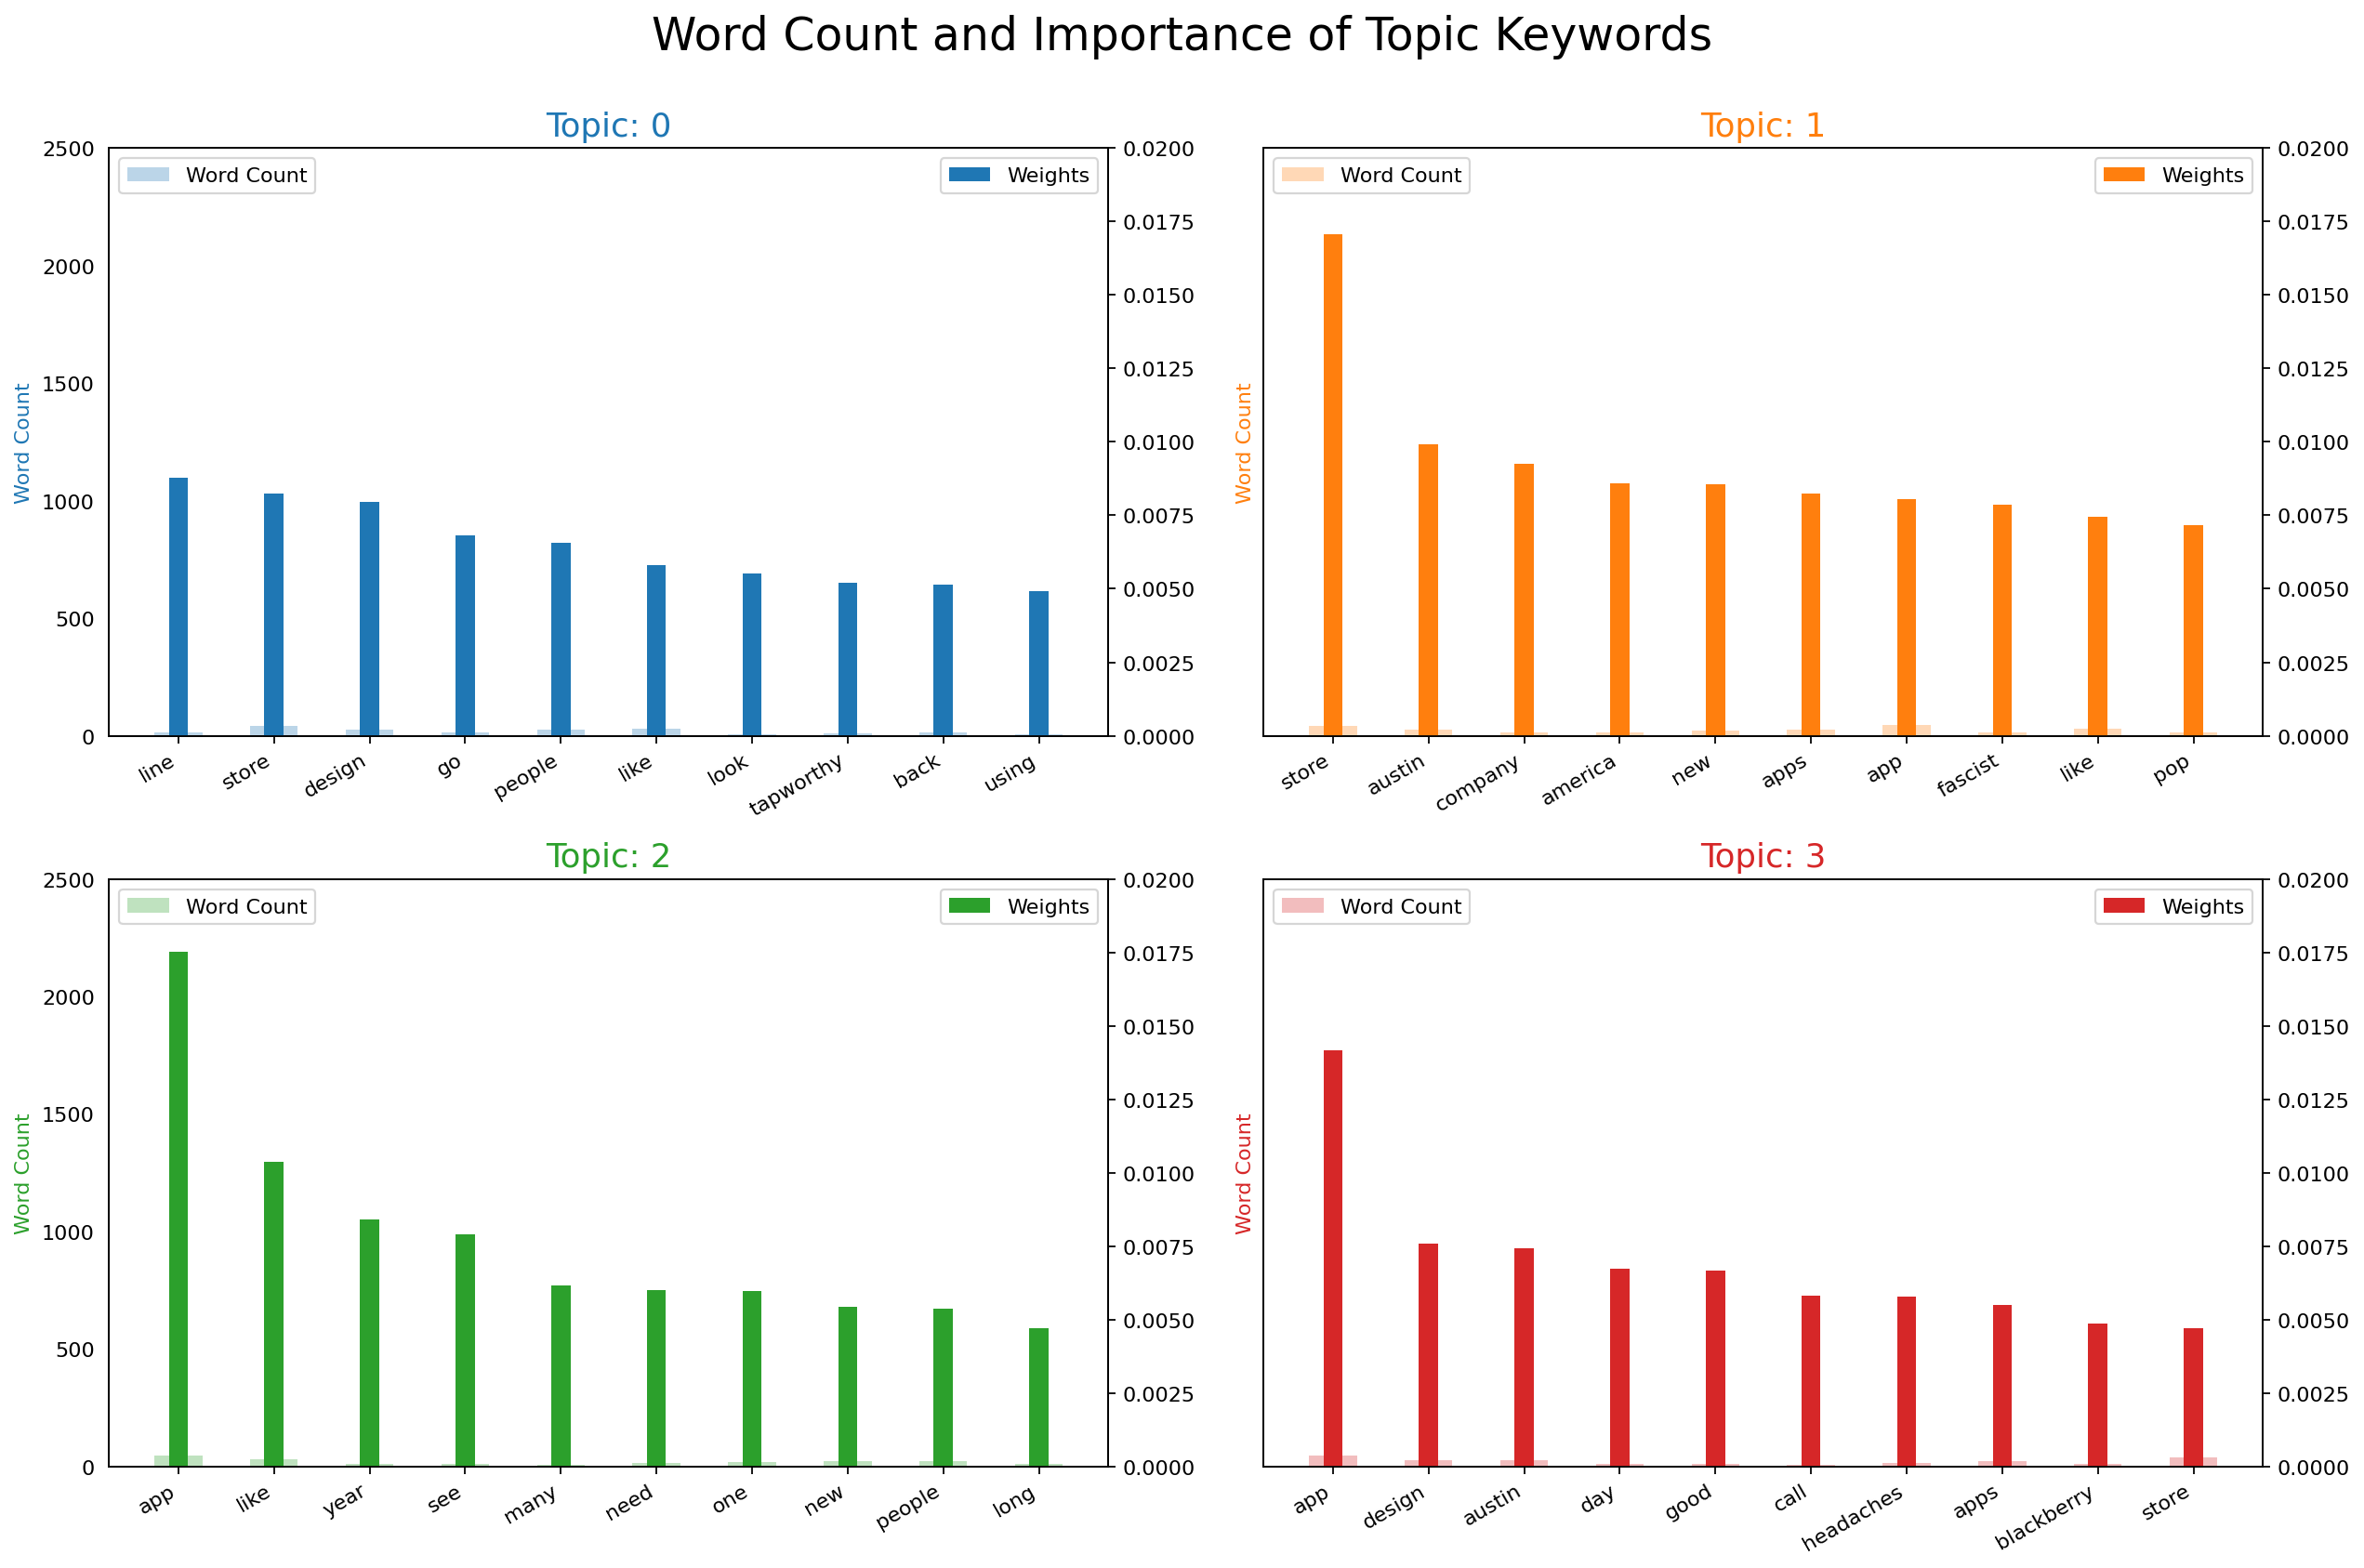

In [53]:
# Word count of Topic Keywords (can compare weights versus word counts).

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.020); ax.set_ylim(0, 2500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### 2. Try seperate LDA for negative tweets (Google)
This is data6 and has 131 tweets.

In [77]:
data6.shape

(131, 4)

In [78]:
# TEXT Pre-processing
# Load the regular expression library
import re
# Remove punctuation
data6['text_processed'] = \
data6['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data6['text_processed'] = \
data6['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data6['text_processed'].head()

<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-78-a69b31ada2ba>:5: DeprecationWarning: invalid escape sequence \.
  data6['text_processed'] = data6['text'].map(la

30     @mention  - false alarm: google circles not coming nowûòand probably not ever - {link} #google #circles #social #sxsw                      
157    they took away the lego pit but replaced it with a recharging station ;) #sxsw and i might check prices for an iphone - crap samsung android
168    google vs bing on #bettersearch bing has a shot at success w/ structured search  potentially higher margin cpa model vs #google #sxsw       
238    ûï@mention google to launch major new social network called circles possibly today {link} #sxswû \nit'll never beat myspace              
269    google is interested in location based tech for indoor venues - businesses convention centers etc  tech needs to improve first  #sxsw       
Name: text_processed, dtype: object

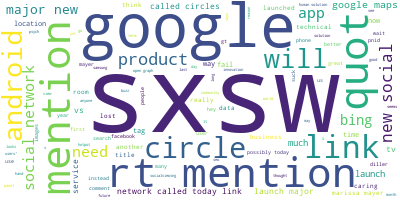

In [79]:
# EDA word viz... for whole dataset.
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data6['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [81]:
# Prepare the data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['sxsw', 'sxswi', 'store', 'quot', 'mention', 'link', 'rt', 'amp', 'http', 'sxswrt', 'google', 'googles', 'app', 'apps', 'android', 'austin', 'quotgoogle', 'new', 'today', 'one', 'apple', 'ipad', 'ipads', 'iphone', 'ipad2', 'apples', 'quotapple'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data6.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['false', 'alarm', 'circles', 'coming', 'uoand', 'probably', 'ever', 'circles', 'social']


[nltk_data] Downloading package stopwords to /Users/markp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
# Create dictionary and corpus
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [83]:
# Train the model
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"social" + 0.018*"circles" + 0.012*"launch" + 0.011*"mayer" + '
  '0.009*"time" + 0.009*"maps" + 0.009*"products" + 0.008*"network" + '
  '0.007*"needs" + 0.007*"bing"'),
 (1,
  '0.015*"bing" + 0.012*"title" + 0.012*"tag" + 0.011*"circles" + '
  '0.011*"social" + 0.011*"location" + 0.009*"images" + 0.009*"launch" + '
  '0.008*"maps" + 0.007*"graph"'),
 (2,
  '0.017*"circles" + 0.015*"major" + 0.014*"social" + 0.012*"launch" + '
  '0.009*"called" + 0.009*"possibly" + 0.009*"network" + 0.008*"need" + '
  '0.008*"service" + 0.006*"data"'),
 (3,
  '0.014*"much" + 0.014*"tv" + 0.012*"way" + 0.012*"caring" + 0.012*"users" + '
  '0.012*"lost" + 0.012*"business" + 0.012*"room" + 0.011*"product" + '
  '0.010*"circles"')]


In [84]:
# Visualize the resulting clusters
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.077281 -0.088818  1       1        25.925709
0     -0.038459  0.076271  2       1        24.959671
3      0.115209 -0.034334  3       1        24.706984
2      0.000531  0.046881  4       1        24.407642, topic_info=    Category      Freq      Term     Total  loglift  logprob
21   Default  6.000000  bing      6.000000  30.0000  30.0000
136  Default  3.000000  caring    3.000000  29.0000  29.0000
137  Default  3.000000  lost      3.000000  28.0000  28.0000
135  Default  3.000000  business  3.000000  27.0000  27.0000
546  Default  3.000000  room      3.000000  26.0000  26.0000
..       ...       ...   ...           ...      ...      ...
97   Topic4   0.877936  another   3.872019 -0.0737  -5.7552 
574  Topic4   0.871625  real      1.987417  0.5860  -5.7624 
138  Topic4   0.875929  much      5.680822 -0.4593  -5.7575 
342  Topic4   0.874244  people    3.144836  0.1301  -5.7594 
87   Topic4   0.873178  better    3.218815  0.1056  -5.7606 

[221 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
536   3      0.524851  acquired
104   1      0.514224  added   
590   2      0.556216  ago     
97    1      0.258263  another 
97    3      0.516526  another 
...  ..           ...      ... 
142   3      0.670496  way     
142   4      0.223499  way     
118   1      0.514222  websites
392   4      0.749163  wonderwe
155   1      0.514265  work    

[266 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


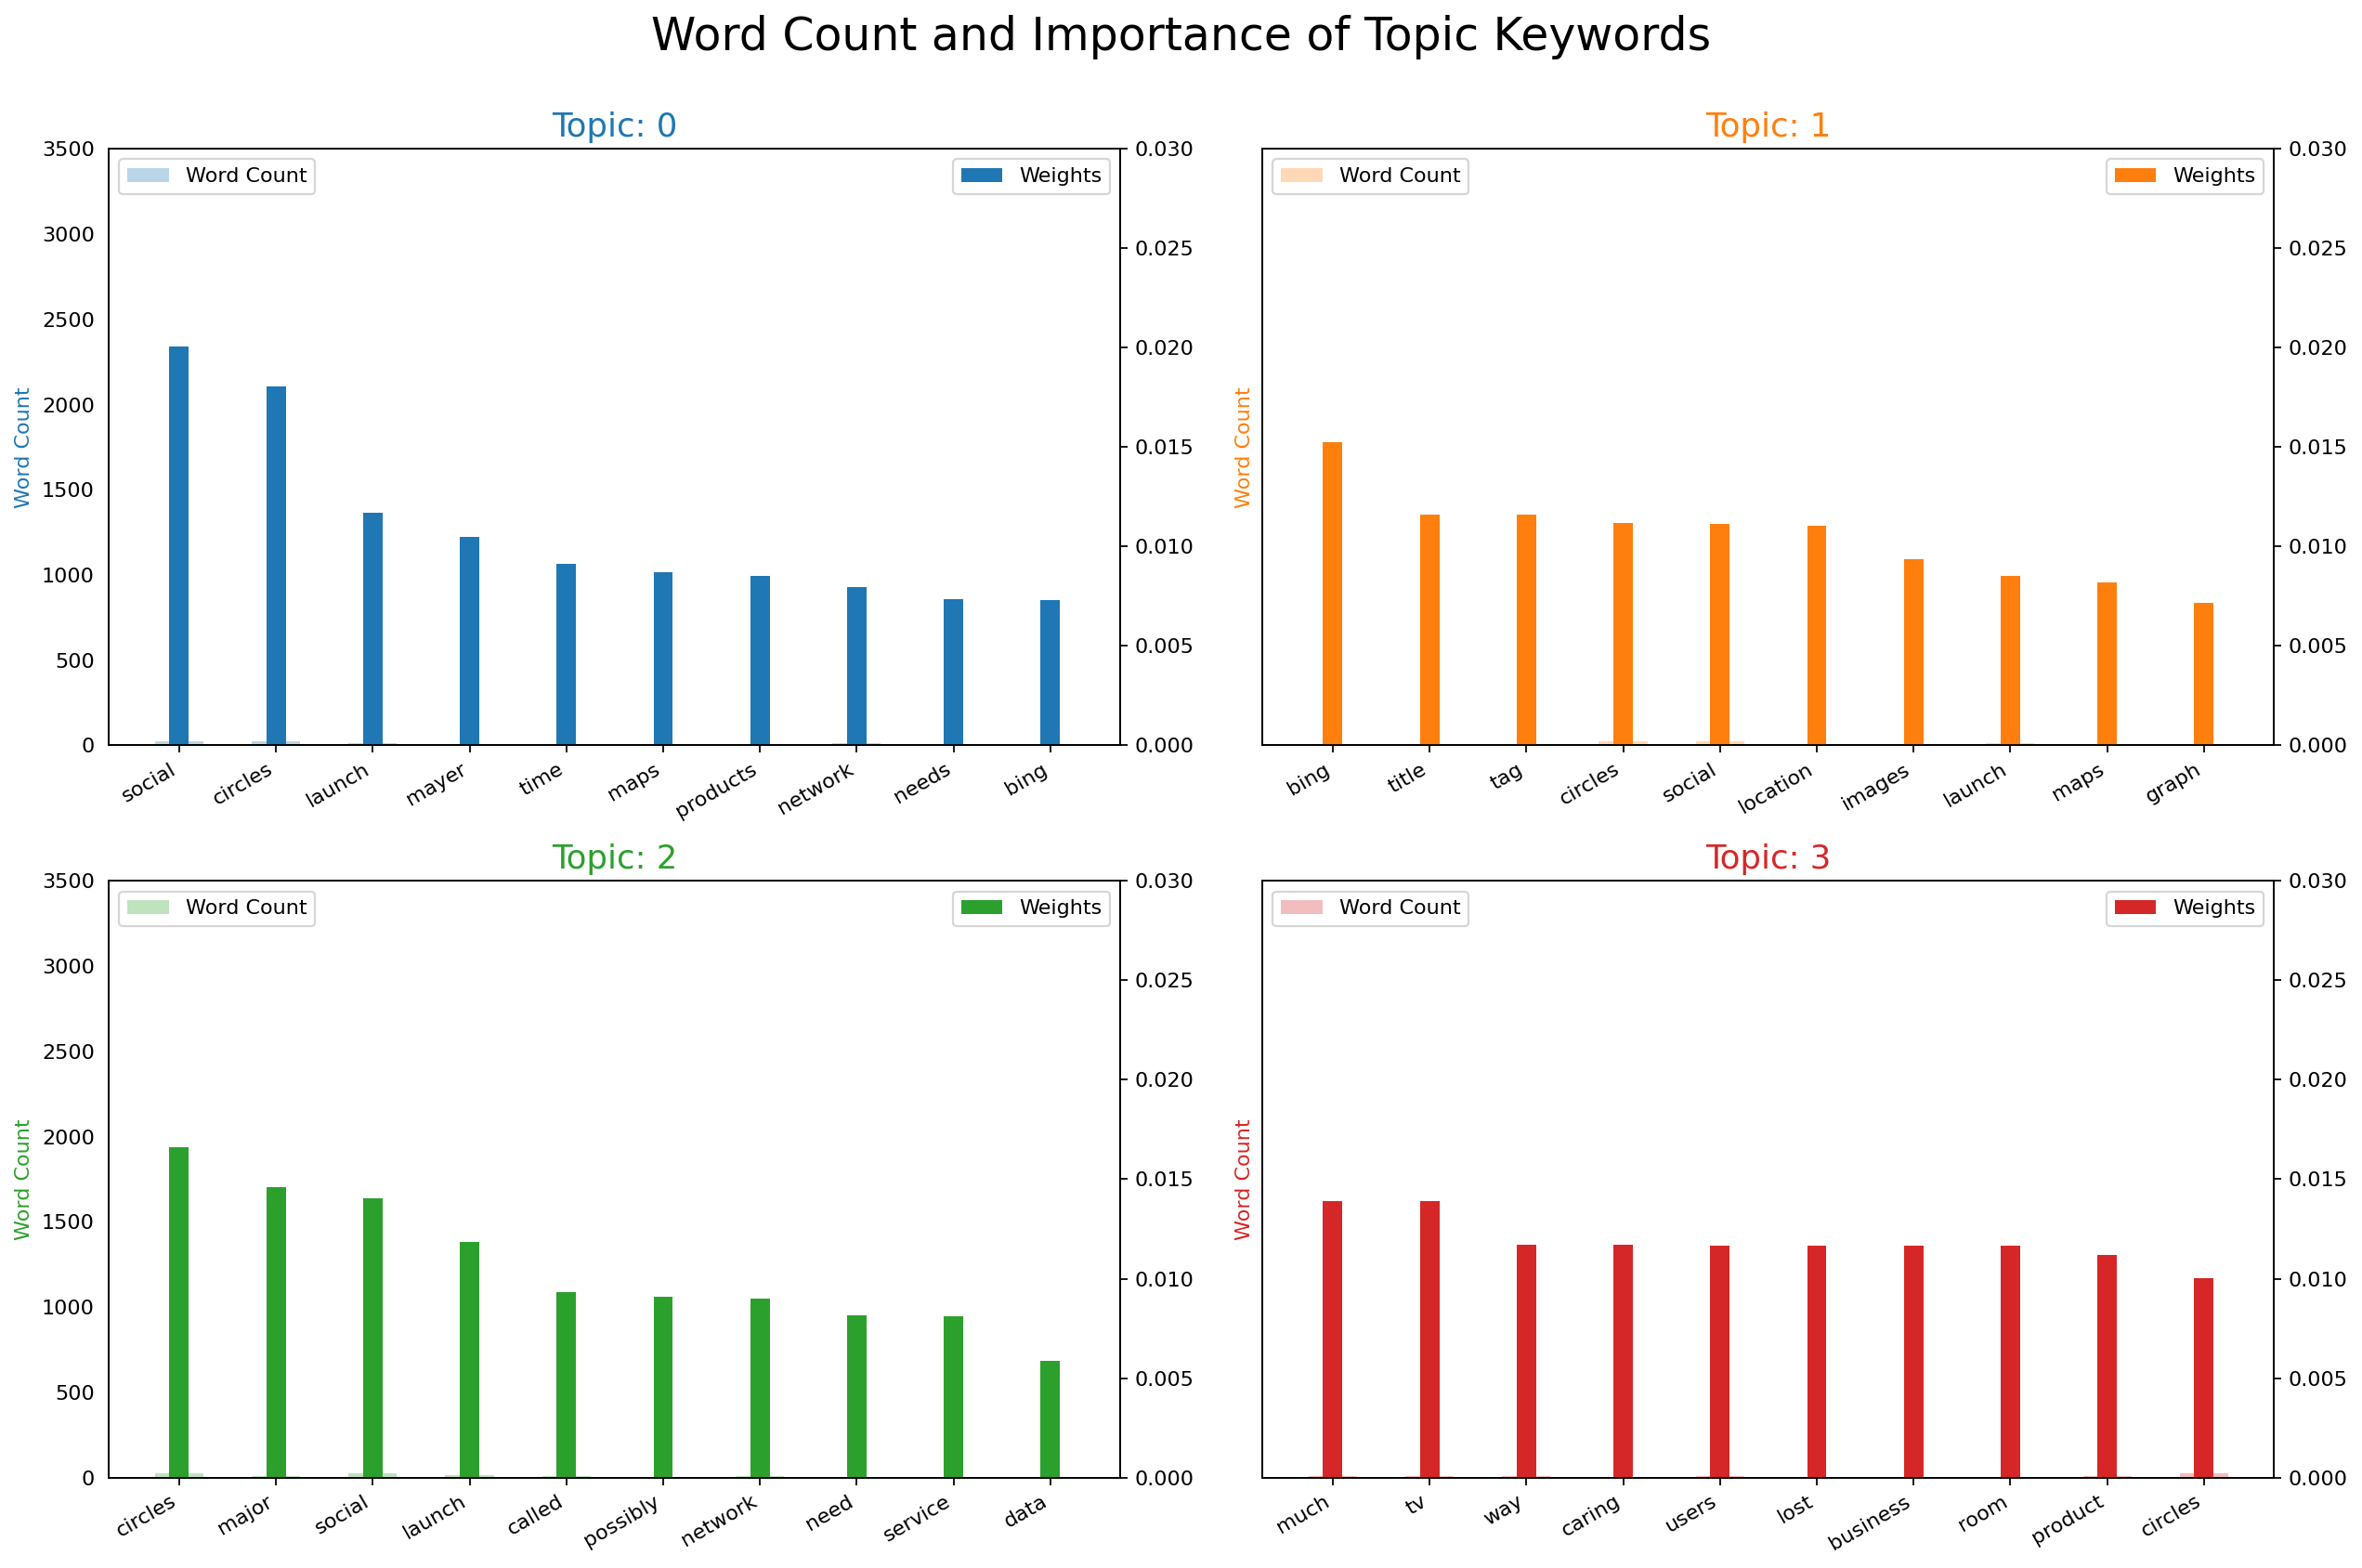

In [85]:
# Word count of Topic Keywords (can compare weights versus word counts).

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### 3. Try seperate LDA for positive tweets (Google)
This is data4 and has 719 tweets.

In [55]:
data4.shape

(719, 4)

In [56]:
# TEXT Pre-processing
# Load the regular expression library
import re
# Remove punctuation
data4['text_processed'] = \
data4['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data4['text_processed'] = \
data4['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data4['text_processed'].head()

<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-56-fed53724e348>:5: DeprecationWarning: invalid escape sequence \.
  data4['text_processed'] = data4['text'].map(la

4     @sxtxstate great stuff on fri #sxsw: marissa mayer (google) tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)      
5     #sxsw is just starting #ctia is around the corner and #googleio is only a hop skip and a jump from there good time to be an #android fan
8     excited to meet the @samsungmobileus at #sxsw so i can show them my sprint galaxy s still running android 21   #fail                    
9     find &amp; start impromptu parties at #sxsw with @hurricaneparty http://bitly/gvlrin i can't wait til the android app comes out         
10    foursquare ups the game just in time for #sxsw http://jmp/grn7pk) - still prefer @gowalla by far best looking android app to date       
Name: text_processed, dtype: object

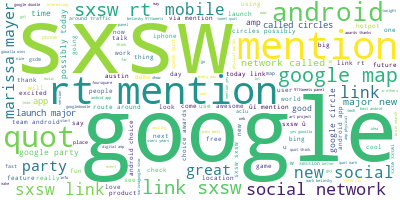

In [57]:
# EDA word viz... for whole dataset.
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data4['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [58]:
# Prepare the data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['sxsw', 'sxswi', 'quot', 'mention', 'link', 'rt', 'amp', 'http', 'sxswrt', 'google', 'googles', 'app', 'apps', 'android', 'austin', 'quotgoogle', 'new', 'today', 'one', 'apple', 'ipad', 'ipads', 'iphone', 'ipad2', 'apples', 'quotapple'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data4.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['sxtxstate', 'great', 'stuff', 'fri', 'marissa', 'mayer', 'tim', 'reilly', 'tech', 'books', 'conferences', 'matt', 'mullenweg', 'wordpress']


[nltk_data] Downloading package stopwords to /Users/markp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Create dictionary and corpus
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [60]:
# Train the model
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"circles" + 0.025*"social" + 0.025*"network" + 0.024*"launch" + '
  '0.019*"called" + 0.019*"major" + 0.014*"possibly" + 0.009*"party" + '
  '0.008*"great" + 0.008*"via"'),
 (1,
  '0.010*"maps" + 0.009*"party" + 0.009*"mayer" + 0.009*"best" + '
  '0.008*"marissa" + 0.008*"mobile" + 0.007*"cool" + 0.006*"get" + '
  '0.006*"thanks" + 0.006*"great"'),
 (2,
  '0.010*"people" + 0.010*"marissa" + 0.010*"mobile" + 0.010*"mayer" + '
  '0.010*"maps" + 0.008*"around" + 0.008*"good" + 0.008*"traffic" + '
  '0.007*"think" + 0.006*"route"'),
 (3,
  '0.023*"maps" + 0.021*"party" + 0.013*"mobile" + 0.011*"time" + '
  '0.009*"users" + 0.008*"social" + 0.007*"circles" + 0.007*"great" + '
  '0.007*"check" + 0.006*"search"')]


In [61]:
# Visualize the resulting clusters
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.122048  0.019322  1       1        29.111996
3     -0.023683 -0.109992  2       1        26.353741
2     -0.077262  0.054306  3       1        23.605774
1     -0.021103  0.036365  4       1        20.928480, topic_info=    Category       Freq     Term      Total  loglift  logprob
182  Default  75.000000  circles  75.000000  30.0000  30.0000
309  Default  35.000000  major    35.000000  29.0000  29.0000
308  Default  52.000000  launch   52.000000  28.0000  28.0000
230  Default  54.000000  network  54.000000  27.0000  27.0000
306  Default  38.000000  called   38.000000  26.0000  26.0000
..       ...        ...     ...         ...      ...      ...
230  Topic4   7.215856   network  54.459469 -0.4571  -5.1785 
164  Topic4   5.433029   day      27.172621 -0.0457  -5.4623 
204  Topic4   4.565786   bing     15.878954  0.3177  -5.6362 
231  Topic4   6.606256   social   64.983582 -0.7221  -5.2668 
308  Topic4   5.238162   launch   52.212448 -0.7353  -5.4988 

[290 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1526  3      0.878744  absolutely 
201   1      0.221165  aclu       
201   2      0.663496  aclu       
201   3      0.110583  aclu       
197   3      0.790191  agileagency
...  ..           ...   ...       
476   2      0.176655  yes        
476   3      0.353311  yes        
476   4      0.441639  yes        
1495  2      0.886202  youtube    
726   3      0.878754  zoom       

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

### 4. Try seperate LDA for positive tweets (Apple)
This is data3 and has 1945 tweets.

In [62]:
data3.shape

(1945, 4)

In [63]:
# TEXT Pre-processing
# Load the regular expression library
import re
# Remove punctuation
data3['text_processed'] = \
data3['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data3['text_processed'] = \
data3['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data3['text_processed'].head()

<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<input>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-63-6bd0b8104945>:5: DeprecationWarning: invalid escape sequence \.
  data3['text_processed'] = data3['text'].map(la

1     @jessedee know about @fludapp  awesome ipad/iphone app that you'll likely appreciate for its design also they're giving free ts at #sxsw
2     @swonderlin can not wait for #ipad 2 also they should sale them down at #sxsw                                                           
6     beautifully smart and simple idea rt @madebymany @thenextweb wrote about our #hollergram ipad app for #sxsw http://bitly/ieavob         
7     counting down the days to #sxsw plus strong canadian dollar means stock up on apple gear                                                
12    great #sxsw ipad app from @madebymany: http://tinyurlcom/4nqv92l                                                                        
Name: text_processed, dtype: object

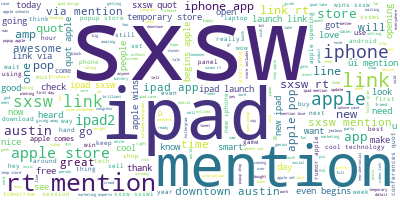

In [64]:
# EDA word viz... for whole dataset.
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data3['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [69]:
# Prepare the data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['sxsw', 'sxswi', 'store', 'quot', 'mention', 'link', 'rt', 'amp', 'http', 'sxswrt', 'google', 'googles', 'app', 'apps', 'android', 'austin', 'quotgoogle', 'new', 'today', 'one', 'apple', 'ipad', 'ipads', 'iphone', 'ipad2', 'apples', 'quotapple'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data3.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /Users/markp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['jessedee', 'know', 'fludapp', 'awesome', 'likely', 'appreciate', 'design', 'also', 'giving', 'free', 'ts']


In [70]:
# Create dictionary and corpus
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [71]:
# Train the model
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"pop" + 0.009*"launch" + 0.007*"awesome" + 0.007*"line" + 0.007*"get" '
  '+ 0.006*"free" + 0.006*"people" + 0.006*"via" + 0.006*"cool" + '
  '0.005*"opening"'),
 (1,
  '0.011*"love" + 0.011*"get" + 0.008*"cool" + 0.007*"like" + 0.006*"go" + '
  '0.006*"good" + 0.006*"free" + 0.006*"popup" + 0.005*"ever" + '
  '0.005*"launch"'),
 (2,
  '0.009*"pop" + 0.008*"via" + 0.008*"temporary" + 0.008*"downtown" + '
  '0.007*"ui" + 0.007*"open" + 0.007*"get" + 0.007*"even" + 0.007*"line" + '
  '0.006*"opening"'),
 (3,
  '0.025*"pop" + 0.008*"great" + 0.008*"line" + 0.008*"time" + 0.006*"video" + '
  '0.006*"day" + 0.006*"going" + 0.005*"smart" + 0.005*"awesome" + '
  '0.005*"shop"')]


In [72]:
# Visualize the resulting clusters
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.023952  0.063214  1       1        31.627449
1     -0.063628  0.019448  2       1        23.539660
3      0.106955  0.009103  3       1        22.691626
0     -0.019374 -0.091765  4       1        22.141264, topic_info=    Category        Freq       Term       Total  loglift  logprob
121  Default  156.000000  pop        156.000000  30.0000  30.0000
162  Default  56.000000   love       56.000000   29.0000  29.0000
241  Default  57.000000   launch     57.000000   28.0000  28.0000
140  Default  36.000000   ui         36.000000   27.0000  27.0000
132  Default  89.000000   get        89.000000   26.0000  26.0000
..       ...        ...   ...              ...       ...      ...
290  Topic4   12.015135   day        52.314667   0.0366  -5.5351 
228  Topic4   9.700154    marketing  33.306873   0.2741  -5.7491 
8    Topic4   9.373888    know       30.112459   0.3407  -5.7834 
33   Topic4   9.912914    great      59.392429  -0.2826  -5.7274 
348  Topic4   8.991871    video      42.757915  -0.0515  -5.8250 

[324 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
512   1      0.741942  action    
512   2      0.057072  action    
512   3      0.171217  action    
512   4      0.057072  action    
645   2      0.949852  air       
...  ..           ...     ...    
373   3      0.067914  year      
373   4      0.203742  year      
1266  2      0.252475  zazzlesxsw
1266  4      0.757425  zazzlesxsw
2971  4      0.840581  zazzlsxsw 

[592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

### APPENDIX
This requires tokenized and lemmatized data. 

In [ ]:
# LDA from Yish study group


import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
from gensim.test.utils import datapath
from gensim.models import KeyedVectors


In [ ]:
word_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
word_vectors.most_similar('coffee')

In [ ]:
# TOPIC MODELING 

import gensim

from nltk.corpus import stopwords
import gensim.corpora as corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [ ]:
def process_words(texts, stop_words=stopwords.words("english"), allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts = [[word for word in doc.split() if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in doc if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(raw.body)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
print(lda_model.print_topics())

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

In [ ]:
# Analyzing the LDA results - this is from the article used above, but I'm unsure of the saving step and path designation. 
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared
